Natural language processing (NLP) is about developing applications and services that are able to understand human languages.

Practical examples of natural language processing (NLP) like 

- speech recognition,

- speech translation,

- splitting sentences from paragraphs, 

- splitting up words, recognizing the part of speech of those words, 

- highlighting the main subjects, and then even with helping our machine to understand what the text is all about.

In [1]:
import nltk

In [ ]:
nltk.download()

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset/sms.tsv',sep='\t',names=['label','messages'])

In [4]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [30]:
df['length'] = df.messages.apply(len)

In [31]:
df.head()

,label,messages,length
0,ham,Go jurong point crazy Available bugis n great ...,82
1,ham,Ok lar Joking wif u oni,23
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,135
3,ham,U dun say early hor U c already say,35
4,ham,Nah dont think goes usf lives around though,43


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

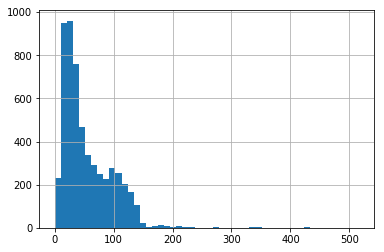

In [33]:
df.length.hist(bins=50)

In [10]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [11]:
df[df.length==910]

,label,messages,length
1085,ham,For me the love should start with attraction.i...,910


In [12]:
df[df.length==910].iloc[0,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001846B72FBA8>,
      dtype=object)

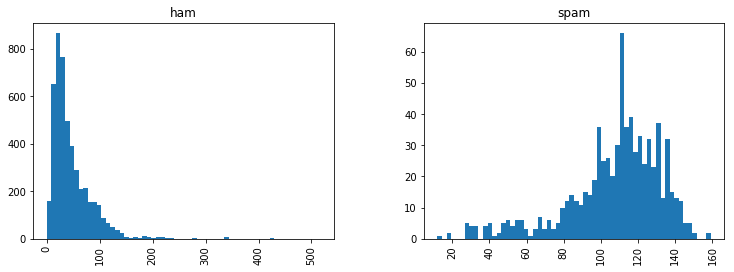

In [34]:
df.hist(column='length',by='label',figsize=(12,4),bins=60)

In [ ]:
###Remove Punctuations from text

In [14]:
import string

In [15]:
s= 'hello john! how are you.. I am fine....:'

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
no_punc = [i for i in s if i not in string.punctuation]

In [18]:
no_punc = ''.join(no_punc)

In [19]:
no_punc

'hello john how are you I am fine'

In [20]:
from nltk.corpus import stopwords

In [21]:
stop_words = stopwords.words('english')

In [22]:
#stop_words

In [23]:
rm_words = [w for w in no_punc.split() if w.lower() not in stop_words]

In [24]:
rm_words

['hello', 'john', 'fine']

In [25]:
def clean_text(msg):
    '''
    1:remove punc
    2:remove stop words
    '''
    m = [w for w in msg if w not in string.punctuation]
    m = ''.join(m)
    
    rm_stop_words = [w for w in m.split() if w.lower() not in stop_words]
    
    return ' '.join(rm_stop_words)

In [26]:
clean_text('hello,hi! john how are you..?')

'hellohi john'

In [27]:
df.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df.messages = df.messages.apply(clean_text)

In [29]:
df.head()

,label,messages,length
0,ham,Go jurong point crazy Available bugis n great ...,111
1,ham,Ok lar Joking wif u oni,29
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,ham,U dun say early hor U c already say,49
4,ham,Nah dont think goes usf lives around though,61


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
bag_of_words = CountVectorizer()
bag_of_words.fit(df['messages'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [38]:
len(bag_of_words.vocabulary_)

9437

In [39]:
test = df.messages[3]

In [40]:
test

'U dun say early hor U c already say'

In [47]:
new_msg = bag_of_words.transform([test])

In [49]:
print (new_msg)

  (0, 1154)	1
  (0, 3011)	1
  (0, 3031)	1
  (0, 4222)	1
  (0, 7192)	2


In [53]:
bag_of_words.get_feature_names()[4222]

'hor'

In [51]:
msg_transform = bag_of_words.transform(df.messages)

In [52]:
msg_transform.shape

(5572, 9437)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mn = MultinomialNB().fit(msg_transform,df.label)

In [ ]:
mn.predict(new_msg)